In [1]:
# 6.1.4 Create WeatherPy.ipynb
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 6.2.6 Import the requests library.
import requests

# 6.2.6 Import the API key.
from config import weather_api_key

# 6.2.6 Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# 6.1.5 Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# 6.1.4 Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#6.1.4 Unpack lat_lngs zip object into a list. This way we only need to create a set of random latitudes
#and longitudes once. In a new cell in the WeatherPy.ipynb file, add the following code and run the cell.

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#6.1.5 We create a cities list to store city names. 
# Create a list for holding the cities.
cities = [] 

#We iterate through the coordinates and retrieve the nearest city using the latitude and longitude pair.
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

#We add a decision statement with the logical operator not in to determine whether the found city 
#is already in the cities list. If not, then we'll use the append() function to add it. 
#We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, 
#which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# 6.2.6 Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
       
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | genhe
Processing Record 2 of Set 1 | cangzhou
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | devils lake
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | kommunar
Processing Record 12 of Set 1 | cabinda
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | jieshi
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 | atuona
Pr

Processing Record 35 of Set 4 | tooele
Processing Record 36 of Set 4 | hailar
Processing Record 37 of Set 4 | yialos
City not found. Skipping...
Processing Record 38 of Set 4 | port elizabeth
Processing Record 39 of Set 4 | muros
Processing Record 40 of Set 4 | vlasenica
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | altdorf
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | pyaozerskiy
Processing Record 47 of Set 4 | kilindoni
Processing Record 48 of Set 4 | ubatuba
Processing Record 49 of Set 4 | ostrovnoy
Processing Record 50 of Set 4 | adrar
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | valkeala
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | taywarah
Processing Record 5 of Set 5 | kropotkin
Processing Record 6 of Set 5 | farroupilha
Processing Record 7 of Set 5 | kaitangata
Processing Record 8 of Set 5 

Processing Record 27 of Set 8 | hay river
Processing Record 28 of Set 8 | hope mills
Processing Record 29 of Set 8 | port keats
Processing Record 30 of Set 8 | kango
Processing Record 31 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 32 of Set 8 | north bend
Processing Record 33 of Set 8 | samarai
Processing Record 34 of Set 8 | avera
Processing Record 35 of Set 8 | bundaberg
Processing Record 36 of Set 8 | temir
Processing Record 37 of Set 8 | kununurra
Processing Record 38 of Set 8 | kulhudhuffushi
Processing Record 39 of Set 8 | saint anthony
Processing Record 40 of Set 8 | burica
City not found. Skipping...
Processing Record 41 of Set 8 | xining
Processing Record 42 of Set 8 | dharchula
Processing Record 43 of Set 8 | santa ana arriba
Processing Record 44 of Set 8 | itarema
Processing Record 45 of Set 8 | springfield
Processing Record 46 of Set 8 | namatanai
Processing Record 47 of Set 8 | pasni
Processing Record 48 of Set 8 | sao gabriel da cachoeira
Processing 

Processing Record 13 of Set 12 | leshukonskoye
Processing Record 14 of Set 12 | pangnirtung
Processing Record 15 of Set 12 | deputatskiy
Processing Record 16 of Set 12 | villazon
Processing Record 17 of Set 12 | ilka
City not found. Skipping...
Processing Record 18 of Set 12 | kaduqli
Processing Record 19 of Set 12 | uusikaupunki
Processing Record 20 of Set 12 | port-cartier
Processing Record 21 of Set 12 | tidore
City not found. Skipping...
Processing Record 22 of Set 12 | sirathu
Processing Record 23 of Set 12 | dwarka
Processing Record 24 of Set 12 | batagay
Processing Record 25 of Set 12 | lichinga
Processing Record 26 of Set 12 | aranjuez
Processing Record 27 of Set 12 | yakeshi
Processing Record 28 of Set 12 | camocim
Processing Record 29 of Set 12 | corn island
Processing Record 30 of Set 12 | bell ville
Processing Record 31 of Set 12 | shaunavon
Processing Record 32 of Set 12 | owando
Processing Record 33 of Set 12 | lorengau
Processing Record 34 of Set 12 | geraldton
Processin

In [7]:
print(len(city_data))


561


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Genhe,50.7833,121.5167,-1.28,100,76,2.24,CN,2022-03-20 17:18:34
1,Cangzhou,38.3167,116.8667,41.43,37,63,6.93,CN,2022-03-20 17:18:34
2,Rikitea,-23.1203,-134.9692,79.61,76,8,12.10,PF,2022-03-20 17:18:35
3,Devils Lake,48.1128,-98.8651,42.78,70,0,16.11,US,2022-03-20 17:18:35
4,Kruisfontein,-34.0033,24.7314,69.89,86,31,8.14,ZA,2022-03-20 17:18:36
5,Souillac,-20.5167,57.5167,79.18,94,40,3.44,MU,2022-03-20 17:18:36
6,Bluff,-46.6000,168.3333,54.61,91,82,2.95,NZ,2022-03-20 17:18:37
7,Kapaa,22.0752,-159.3190,69.78,87,0,8.05,US,2022-03-20 17:18:37
8,Port Alfred,-33.5906,26.8910,72.93,73,40,11.52,ZA,2022-03-20 17:18:38
9,Ilulissat,69.2167,-51.1000,-0.38,65,20,0.00,GL,2022-03-20 17:18:39


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [10]:
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Genhe,CN,2022-03-20 17:18:34,50.7833,121.5167,-1.28,100,76,2.24
1,Cangzhou,CN,2022-03-20 17:18:34,38.3167,116.8667,41.43,37,63,6.93
2,Rikitea,PF,2022-03-20 17:18:35,-23.1203,-134.9692,79.61,76,8,12.10
3,Devils Lake,US,2022-03-20 17:18:35,48.1128,-98.8651,42.78,70,0,16.11
4,Kruisfontein,ZA,2022-03-20 17:18:36,-34.0033,24.7314,69.89,86,31,8.14
...,...,...,...,...,...,...,...,...,...
556,Vestmannaeyjar,IS,2022-03-20 17:36:22,63.4427,-20.2734,40.19,60,75,13.80
557,Oistins,BB,2022-03-20 17:36:24,13.0667,-59.5333,78.40,72,33,19.84
558,Bako,ET,2022-03-20 17:36:25,5.7833,36.5667,69.24,62,97,4.59
559,Umm Lajj,SA,2022-03-20 17:36:25,25.0213,37.2685,69.44,66,81,10.04


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

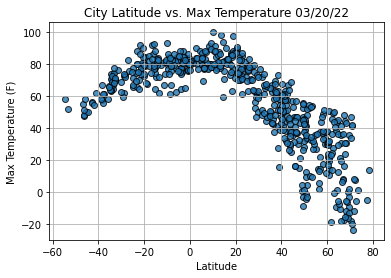

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

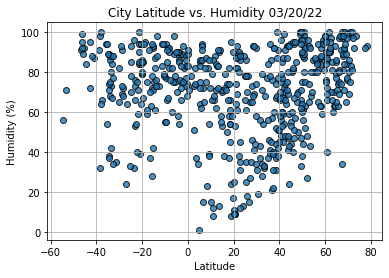

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

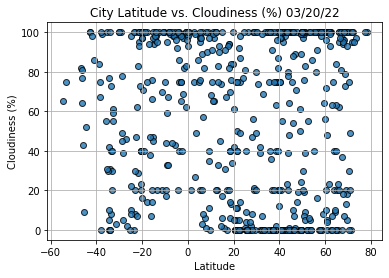

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

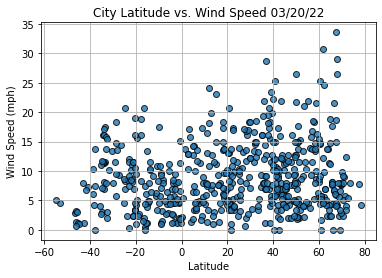

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line 
# and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2022-03-20 17:18:42
Lat                      -34.4187
Lng                       19.2345
Max Temp                     73.8
Humidity                       71
Cloudiness                      0
Wind Speed                  16.06
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
556     True
557     True
558     True
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Genhe,CN,2022-03-20 17:18:34,50.7833,121.5167,-1.28,100,76,2.24
1,Cangzhou,CN,2022-03-20 17:18:34,38.3167,116.8667,41.43,37,63,6.93
3,Devils Lake,US,2022-03-20 17:18:35,48.1128,-98.8651,42.78,70,0,16.11
7,Kapaa,US,2022-03-20 17:18:37,22.0752,-159.3190,69.78,87,0,8.05
9,Ilulissat,GL,2022-03-20 17:18:39,69.2167,-51.1000,-0.38,65,20,0.00


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


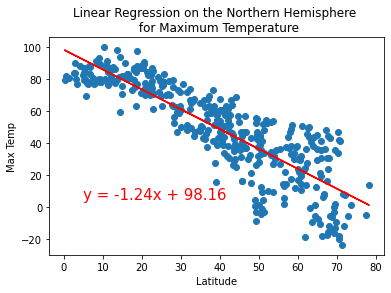

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function. If the equation for the regression line doesn't show up on your graph, 
# you can change the text_coordinates until you see the equation. I changed coordinates from (10,40) to (5,5)
# in order to see the equation.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,5))


In [42]:
# checking rvalue for northern hemisphere/max temp
linregress(x_values, y_values)

LinregressResult(slope=-1.2400488656070285, intercept=98.15996326759631, rvalue=-0.8573015259585259, pvalue=1.1503549596373014e-115, stderr=0.03751526028579073, intercept_stderr=1.65653601103833)

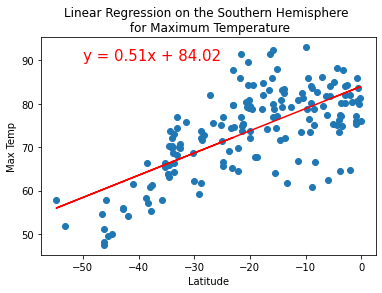

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


In [46]:
#Checking rvalue for southern hemisphere/max temp
linregress(x_values, y_values)


LinregressResult(slope=0.511797728320088, intercept=84.01924081357453, rvalue=0.6907888012388101, pvalue=9.955886299268341e-25, stderr=0.04195962052671739, intercept_stderr=1.011933368593743)

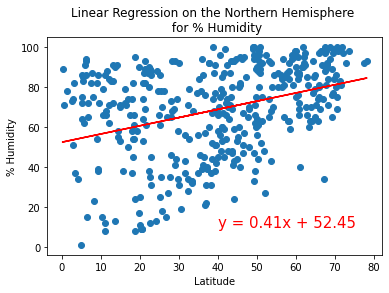

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [48]:
#Checking rvalue for Northern Hemisphere / Humidity
# rvalue = 0.35; rvalue close to 1 shows strong correlation, close to 0 means no correlation
linregress(x_values, y_values)

LinregressResult(slope=0.4109199595370556, intercept=52.44917613845358, rvalue=0.3518672009554133, pvalue=5.519584190592704e-13, stderr=0.05507181059080934, intercept_stderr=2.4317687453527124)

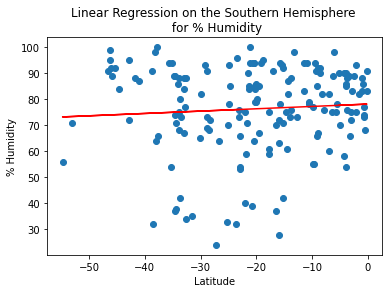

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [51]:
#Checking rvalue for Southern Hemisphere / Humidity
# The rvalue = .07 meaning no correlation

linregress(x_values, y_values)

LinregressResult(slope=0.08996659065154268, intercept=78.14168185039266, rvalue=0.07031228739891686, pvalue=0.36949336045688574, stderr=0.09997238090071413, intercept_stderr=2.411017709437585)

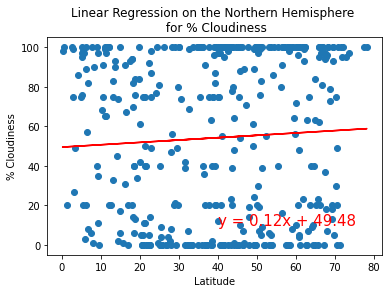

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Checking rvalue for Northern Hemisphere/cloudiness
# rvalue is .06
linregress(x_values, y_values)

LinregressResult(slope=0.11923589567994274, intercept=49.48205004599748, rvalue=0.056997184002944526, pvalue=0.25781767826071156, stderr=0.10522015033076068, intercept_stderr=4.646135113603088)

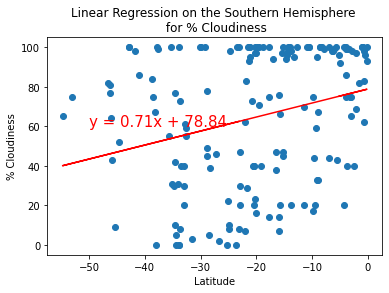

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Checking rvalue for Southern Hemisphere/cloudiness
# rvalue is .06
linregress(x_values, y_values)

LinregressResult(slope=0.7075965960486086, intercept=78.84021350323845, rvalue=0.27268154830424496, pvalue=0.0003949727362915389, stderr=0.19555024217460162, intercept_stderr=4.716053501176595)

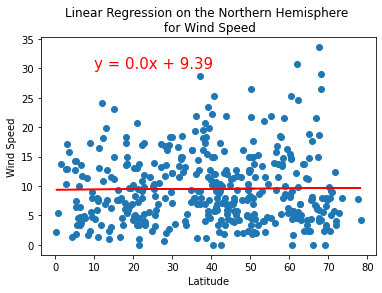

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,30))

In [69]:
# Checking rvalue for northern hemisphere wind speed
# rvalue is .01
linregress(x_values, y_values)

LinregressResult(slope=0.0037119697666583166, intercept=9.38640304440565, rvalue=0.012237712946005886, pvalue=0.8081861528360071, stderr=0.015280006348870898, intercept_stderr=0.6747089203959509)

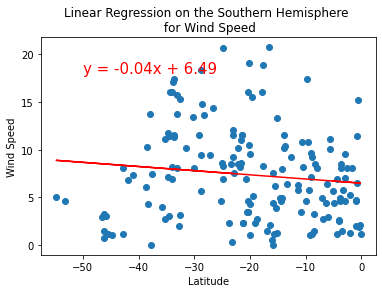

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,18))


In [83]:
# Checking rvalue for southern hemisphere wind speed
# rvalue is .12
linregress(x_values, y_values)

LinregressResult(slope=-0.04371108464639265, intercept=6.487422556086437, rvalue=-0.11943047027684153, pvalue=0.12653154978380107, stderr=0.028461843567425458, intercept_stderr=0.6864096690110418)